# Assignment 4
- by Martim Silva 51304 and Alexandre Sobreira 59451

In [27]:
def plot(rolls_full, dice_full, length, best_model):
    #get predicted states from rolls with new model
    states = best_model.predict(rolls_full)
    # plot recovered states compared with true model states
    fig, ax = plt.subplots()
    ax.plot(dice_full[:length], label='generated') # Give true states
    ax.plot(states[:length] + 1.5, label='recovered') # Give predicted states from given rolls
    ax.set_yticks([])
    ax.set_title('States compared to generated')
    ax.set_xlabel('Time (# rolls)')
    ax.set_xlabel('State')
    ax.legend()
    fig.show()

def fit_model(X_train, X_validate, combo, components, startprob, emission_prob):
    best_score = best_model = None
    n_fits = 50
    np.random.seed(13)
    for idx in range(n_fits):
        if combo == "":
            model = hmm.CategoricalHMM(
            n_components=components, random_state=idx,
            init_params= "ste")
        elif combo == "sp":
            model = hmm.CategoricalHMM(
            n_components=components, random_state=idx,
            init_params= "te")
            model.startprob_ = startprob
        else: #sp & ep
            model = hmm.CategoricalHMM(
            n_components=components, random_state=idx,
            init_params= "t")
            model.startprob_ = startprob
            model.emissionprob_ = emission_prob  
        model.fit(X_train)
        score = model.score(X_validate)
        #print(f'Model #{idx}\tScore: {score}')
        if best_score is None or score > best_score:
            best_model = model
            best_score = score   
    print(f"Best score: {best_score}")
    return best_model

In [28]:
#!pip install hmmlearn
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import MultinomialHMM
from hmmlearn import hmm

# Problem 2

In [29]:
# Data for a and b
dice = np.array([[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[1],[1],[1],[1],[1],
                        [1],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[1],[1],[1],[1],
                        [1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[0],[0],[0],[0],[0],
                        [0],[0],[0]])

## F=1; L=0


rolls = np.array([[6],[6],[4],[1],[5],[3],[2],[1],[6],[1],[6],[2],[1],[1],[5],[2],[3],[4],
                   [6],[5],[3],[2],[1],[4],[3],[5],[6],[6],[3],[4],[2],[6],[1],[6],[5],[5],
                   [2],[3],[4],[2],[3],[2],[3],[1],[5],[1],[4],[2],[4],[6],[4],[1],[5],[6],
                   [6],[6],[3],[2],[4],[6]])-1
                   
X_train = rolls[:50]
X_validate = rolls[50:]

## a) 
- construct the model assuming all parameters known.

In [30]:
true_model = hmm.CategoricalHMM(n_components=2, random_state=99)

- transition matrix $\Alpha$:
    - $ \begin{bmatrix}
            1-\alpha & alpha \\
            \beta & 1-\beta
        \end{bmatrix} $


In [31]:
true_model.transmat_ = np.array([[1-.05, .05],
                                [.1, 1-.1]])

- stationary probabilities, vector $\pi$:
    - $\pi_1 = \beta / (\alpha+\beta) $ $\pi_2 = \alpha / (\alpha+\beta)$ 

In [32]:
true_model.startprob_ = np.array([.1/(.05+.1), .05/(.05+.1)])

- emission matrix $\Beta$:

In [33]:
true_model.emissionprob_ = \
    np.array([[1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6],
              [1 / 10, 1 / 10, 1 / 10, 1 / 10, 1 / 10, 5 / 10]])

- number of features:

In [34]:
true_model.n_features = 6

## b)
- train the model assuming the transition probability matrix is unknown. 
- Compare the estimated transition matrix with the original one. 
- Visualize the generated dice series against the given one.

### b.1 - train the model assuming the transition probability matrix is unknown.

- Since the EM algorithm is a gradient-based optimization method, it will generally get stuck in local optima.
    - We create a for loop with 50 fits to reduce this probability of the model to get stuck on a local minima. This can be seen in the function created.
- We ask to initialize the transmission matrix and give the start  probabilities and emission matrix.

In [35]:
start_prob = np.array([.1/(.05+.1), .05/(.05+.1)])
emission_prob= \
    np.array([[1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6],
            [1 / 10, 1 / 10, 1 / 10, 1 / 10, 1 / 10, 5 / 10]])
    
best_model = fit_model(X_train, X_validate, "sp & ep", 2, start_prob, emission_prob)

Best score: -17.23335326008118


- The log-likelihood value is a way to measure the goodness of fit for a model. The higher the value of the log-likelihod, the better a models fits a dataset, meaning the closer to 0 the best
    - Here we have a best score of -17.233

### b.2 - Compare the estimated transition matrix with the original one.

In [36]:
print(f'Transition Matrix Generated:\n{true_model.transmat_.round(3)}\n\n'
      f'Transition Matrix Recovered:\n{best_model.transmat_.round(3)}\n\n')

Transition Matrix Generated:
[[0.95 0.05]
 [0.1  0.9 ]]

Transition Matrix Recovered:
[[0.005 0.995]
 [0.832 0.168]]




- As we can see the transition Matrix Generated corresponds to the one we gave initialy, on the other hand the transition Matrix Recovered seems to be changed. The identities seem to be transposed (i.e the 1-alpha is now the alpha and the 1-beta is now the beta) but still the basic patern does not seems to change.
- To note that in this case, we did not omited any parameters other than the transition matrix, leading to an easier estimation of the original transition matrix.

### b.3 - Visualize the generated dice series against the given one.

C:\Users\afbso\AppData\Local\Temp\ipykernel_18536\2758724324.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


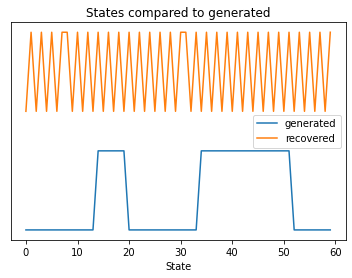

In [37]:
plot(rolls, dice, 60, best_model)

- The prediction of the states seem quite caotic and imperfect
- Is possible to observe that the recovered states are very far from the actual states.
- Possibly with higher sample the prediction will improve

## c) 

1 - Train HMM’s with half of the data points and observe the log-likelihood with the remaining half. 

2 - Compare the estimated parameters (transition and emission matrices) with the original model from question a). 

3 - Visualize the generated dice series of the last half of data against the given one. (Note: Use the dataset provided in files rolls.txt and dice.txt provided on Moodle):
- (i) Assume both transition and emission matrices are unknown.
- (ii) Assume all the parameters unknown, including the number of states (suggestion: try
with the number of states from 1 to 4 and compare the resulting log-likehoods).

In [38]:
# Data preparation
## rolls
rolls_full = np.loadtxt("rolls.txt", dtype=int)
rolls_full = np.array([[int(i)] for i in rolls_full])-1
## dice states
dice_full = np.genfromtxt("dice.txt", dtype="str")
dice_full = np.array([[0] if i == "L" else [1] for i in dice_full])
## Check lenght
print(len(rolls_full))
print(len(dice_full))
## train n=550
X_train_full = rolls_full[:rolls_full.shape[0] // 2]
## validate n=550
X_validate_full = rolls_full[rolls_full.shape[0] // 2:]

1100
1100


### c.i

#### c.i.1
- Lets train HMM's with half of the data points and observe the log-likelihood with the remaining half, assuming both transition and emission matrices are unknown.

In [39]:
startprob = np.array([.1/(.05+.1), .05/(.05+.1)])
emission_prob = 0 
best_model = fit_model(X_train_full, X_validate_full, "sp", 2, startprob, emission_prob)

Best score: -961.3408913323591


- assuming both transition and emission matrices are unknown we obtain a log-likelihood of -961.341 which is much lower than the value obtained with the model trained in .b(-17.233) where we gave everything less the transition matrix. 
- Is possible that the log-likelihood reduces as the number of samples increases. This can happen because the likelihood of the data is a product of the probabilities of each individual sample, and as the number of samples increases, the product of these probabilities can become very small, resulting in a lower log-likelihood
- Comparing models created with diferent sample size may not be adequate
    - We will verify the prediction which may be a better indicator of the model quality

#### c.i.2
- lets compare the estimated parameter (transition and emission matrices) with the original model from question a).

In [40]:
print(f'Transition Matrix Generated:\n{true_model.transmat_.round(3)}\n\n'
      f'Transition Matrix Recovered:\n{best_model.transmat_.round(3)}\n\n')
print(f'Emission Matrix Generated:\n{true_model.emissionprob_.round(3)}\n\n'
      f'Emission Matrix Recovered:\n{best_model.emissionprob_.round(3)}\n\n')

Transmission Matrix Generated:
[[0.95 0.05]
 [0.1  0.9 ]]

Transmission Matrix Recovered:
[[0.959 0.041]
 [0.034 0.966]]


Emission Matrix Generated:
[[0.167 0.167 0.167 0.167 0.167 0.167]
 [0.1   0.1   0.1   0.1   0.1   0.5  ]]

Emission Matrix Recovered:
[[0.124 0.109 0.079 0.099 0.156 0.432]
 [0.166 0.126 0.193 0.167 0.143 0.206]]




- Even though the score for this model showed to be worse than the true model, it is possible to observe that for both transition and emission matrices relative good estimates were obtained
    - This predictions may be considered better than the the ones obtained in .b, which makes sense due to the increase in sample size

#### c.i.3
- Lets vizualize the generated dice series of the last half of data against the given one

C:\Users\afbso\AppData\Local\Temp\ipykernel_18536\2758724324.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


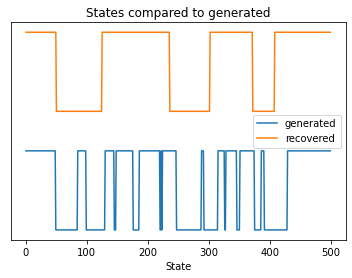

In [41]:
plot(rolls_full, dice_full, 500, best_model)

- Even if imperfect, the recovered states can give as a notion of the real states
    - The recovered states seem to present a degree of bias when compared to the generated states. Some degree of detail from the true states is lost in the recovered ones.

- Even if the value of log-likelihood seems to be worst, the predictions aproximate much better the reality. 
- The log-likelihood, which is a  measure of model fit, seems that is not always a perfect indicator of how well a model will perform in practice.

### c.ii


#### c.ii.1
- Lets train HMM's with half of the data points and observe the log-likelihood with the remaining half, assuming all the parameters unknown, including the number of states.
- We will try with the number of states from 1 to 4 and compare the resulting log-likehoods


In [42]:
models = []
for i in range(1, 5):
    print("number of states = ", i)
    best_model = fit_model(X_train_full, X_validate_full, "", i, startprob, emission_prob)
    models.append(best_model)
    

number of states =  1
Best score: -969.3308570167918
number of states =  2
Best score: -960.3554506448932
number of states =  3
Best score: -958.8121647722068
number of states =  4
Best score: -959.5656281348257


- We can observe that the log-likelihood gets smaller until number of states = 3 (-958.812) after which it start rising again. 

- When comparing with previous model (c.i) with componets = 2:
    - Assuming all the parameters unknown we obtain a log-likelihood of -960.355 which is a little bit lower than the one obtain in c.i (-961.341) were both transition and emission matrices were omited.
    - Given that the diference is small between this model and the one obtained in c.i, we assume that omiting the states didnt made much diference to the model.

#### c.ii.2
- lets compare the estimated parameter (Transmission  and emission matrices) with the original model from question a).

In [43]:
for i in models:
      print("model with " + str(i.n_components) + " states")
      print(f'Transition Matrix Recovered:\n{i.transmat_.round(3)}')
      print(f'Emission Matrix Recovered:\n{i.emissionprob_.round(3)}')

model with 1 states
Transition Matrix Recovered:
[[1.]]
Emission Matrix Recovered:
[[0.147 0.118 0.142 0.136 0.149 0.307]]
model with 2 states
Transition Matrix Recovered:
[[0.922 0.078]
 [0.063 0.937]]
Emission Matrix Recovered:
[[0.133 0.093 0.083 0.085 0.165 0.441]
 [0.158 0.138 0.189 0.177 0.137 0.201]]
model with 3 states
Transition Matrix Recovered:
[[0.607 0.006 0.387]
 [0.017 0.912 0.071]
 [0.779 0.213 0.008]]
Emission Matrix Recovered:
[[0.165 0.186 0.261 0.108 0.132 0.149]
 [0.14  0.107 0.09  0.08  0.157 0.426]
 [0.13  0.006 0.025 0.341 0.164 0.333]]
model with 4 states
Transition Matrix Recovered:
[[0.426 0.001 0.332 0.241]
 [0.854 0.126 0.018 0.002]
 [0.27  0.604 0.06  0.066]
 [0.087 0.    0.104 0.808]]
Emission Matrix Recovered:
[[0.007 0.196 0.153 0.199 0.233 0.212]
 [0.514 0.069 0.208 0.157 0.008 0.043]
 [0.147 0.038 0.248 0.217 0.123 0.227]
 [0.152 0.105 0.079 0.058 0.136 0.47 ]]


- It is possible to observe that for both transition and emission matrices, if no components(states) are provided, the model isnt able to recover the transmission nor the emission matrices
- With 2 components we can observe that both  transition and emission matrices good estimates were obtained with no big difernces from the one obtained in .c.i
- With more than 2 components the matrices adapt to more possible states

#### c.ii.3

C:\Users\afbso\AppData\Local\Temp\ipykernel_18536\2758724324.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\afbso\AppData\Local\Temp\ipykernel_18536\2758724324.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\afbso\AppData\Local\Temp\ipykernel_18536\2758724324.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\afbso\AppData\Local\Temp\ipykernel_18536\2758724324.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


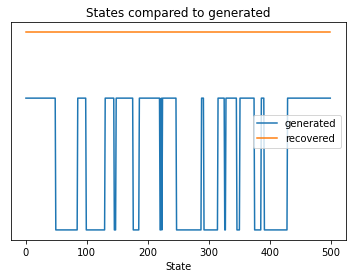

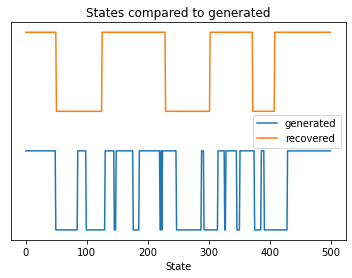

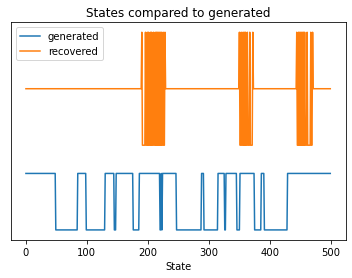

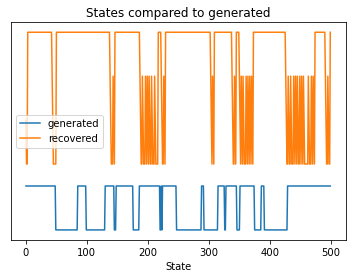

In [44]:
for i in models:
    plot(rolls_full, dice_full, 500, i)

- For states = 2
    - Even if imperfect the recovered states can give as a notion of the real states.
    - No major diferences can be observed when comapring with the previous model in c.i.1
- For 1 or > 2 states:
    - Given that diferent number of states are being compared no useful interpretation can be made.
    

## d)

- Lets generate 30000 samples from the model of question a).

In [45]:
# model of question a)
true_model = hmm.CategoricalHMM(n_components=2, random_state=99)

true_model.startprob_ = np.array([.1/(.05+.1), .05/(.05+.1)])

true_model.transmat_ = np.array([[0.95, 0.05],
                                [0.1, 0.90]])

true_model.emissionprob_ = \
    np.array([[1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6],
              [1 / 10, 1 / 10, 1 / 10, 1 / 10, 1 / 10, 5 / 10]])
   
# generate 30000 samples    
rolls_mega, dice_states_mega = true_model.sample(30000)

# spliting data in half
X_train_mega = rolls_mega[:rolls_mega.shape[0] // 2]
X_validate_mega = rolls_mega[rolls_mega.shape[0] // 2:]

- Lets repeat question c) with this new dataset

### d.i

#### d.i.1
- Lets train HMM's with half of the data points and observe the log-likelihood with the remaining half, assuming both transition and emission matrices are unknown.

In [46]:
startprob = np.array([.1/(.05+.1), .05/(.05+.1)])
emission_prob = 0 

best_model = fit_model(X_train_mega, X_validate_mega, "sp", 2, startprob, emission_prob)

Best score: -26236.76080655543


- Assuming both transition and emission matrices are unknown, now with a sample of 30000 total, we obtain a log-likelihood of -26236.761 which is much lower than the value obtained with the model trained in c.i.1(-961.341). 
- As we saw previously, the  log-likelihood value may not be the best indicator of how the model will predict new data.
    - Seems that as the data increases the score descreases. Again, this can happen because the likelihood of the data is a product of the probabilities of each individual sample, and as the number of samples increases, the product of these probabilities can become very small, resulting in a lower log-likelihood. It is possible that the model is still doing a good job of capturing the underlying patterns in the data as we saw in previous exercises. Lets verify it.


#### d.i.2
- lets compare the estimated parameter (transition and emission matrices) with the original model from question a).

In [47]:
print(f'Transition Matrix Generated:\n{true_model.transmat_.round(3)}\n\n'
      f'Transition Matrix Recovered:\n{best_model.transmat_.round(3)}\n\n')
print(f'Emission Matrix Generated:\n{true_model.emissionprob_.round(3)}\n\n'
      f'Emission Matrix Recovered:\n{best_model.emissionprob_.round(3)}\n\n')

Transition Matrix Generated:
[[0.95 0.05]
 [0.1  0.9 ]]

Transition Matrix Recovered:
[[0.925 0.075]
 [0.036 0.964]]


Emission Matrix Generated:
[[0.167 0.167 0.167 0.167 0.167 0.167]
 [0.1   0.1   0.1   0.1   0.1   0.5  ]]

Emission Matrix Recovered:
[[0.102 0.102 0.104 0.096 0.107 0.489]
 [0.16  0.162 0.163 0.165 0.166 0.183]]




- It is possible to observer that for both transition and emission matrices good estimates were obtained, without any major diference from model trained in .c, exept for the Emission matrix that even though the positions seem to be changed, the values aproximate much better than on previous models.
- Again the log likelyhood value doesnt seems to be the most adequate measure to evaluate the model quality
    - The predicted matrices (recovered) seem to be a much better indicatior of the model quality

### d.ii

#### d.ii.1
- Lets train HMM's with half of the data points and observe the log-likelihood with the remaining half, assuming all the parameters unknown, including the number of states.

In [48]:
models = []
for i in range(1, 5):
    print("number of states = ", i)
    best_model = fit_model(X_train_mega, X_validate_mega, "", i, startprob, emission_prob)
    models.append(best_model)

number of states =  1
Best score: -26395.622357831373
number of states =  2
Best score: -26229.17147300787
number of states =  3
Best score: -26227.741550577648
number of states =  4
Best score: -26232.505273798255


- Comparing with previou model with componets = 2:
    - assuming both transition and emission matrices are unknown, now with a sample of 30000 total, we obtain a log-likelihood of -26229.171 which is very simillar to the value obtained with the model trained in d.i.1(-26236.760) even though less information was provided
- Also, we can observe that the log-likelihood gets smaller until number of states = 3 after which it start rising again.

#### d.ii.2
- lets compare the estimated parameter (transition and emission matrices) with the original model from question a).

In [49]:
for i in models:
      print("model with " + str(i.n_components) + " states")
      print(f'Transition Matrix Recovered:\n{i.transmat_.round(3)}')
      print(f'Emission Matrix Recovered:\n{i.emissionprob_.round(3)}')

model with 1 states
Transition Matrix Recovered:
[[1.]]
Emission Matrix Recovered:
[[0.142 0.143 0.144 0.143 0.147 0.282]]
model with 2 states
Transition Matrix Recovered:
[[0.897 0.103]
 [0.056 0.944]]
Emission Matrix Recovered:
[[0.102 0.098 0.107 0.092 0.106 0.494]
 [0.163 0.167 0.164 0.17  0.169 0.167]]
model with 3 states
Transition Matrix Recovered:
[[0.932 0.066 0.002]
 [0.069 0.862 0.069]
 [0.471 0.462 0.067]]
Emission Matrix Recovered:
[[0.163 0.17  0.163 0.176 0.171 0.158]
 [0.113 0.109 0.105 0.095 0.093 0.486]
 [0.088 0.03  0.274 0.103 0.359 0.146]]
model with 4 states
Transition Matrix Recovered:
[[0.058 0.107 0.158 0.678]
 [0.565 0.    0.229 0.206]
 [0.001 0.093 0.892 0.014]
 [0.068 0.751 0.001 0.18 ]]
Emission Matrix Recovered:
[[0.15  0.086 0.22  0.012 0.034 0.497]
 [0.099 0.111 0.114 0.109 0.137 0.43 ]
 [0.166 0.172 0.172 0.18  0.175 0.135]
 [0.097 0.117 0.017 0.147 0.143 0.479]]


- It is possible to observe that for both transition and emission matrices, if no components(states) are provided, the model isnt able to recover the transmission nor the emission matrices
- With 2 components we can observe that both  transition and emission matrices good estimates were obtained. 
- With more than 2 components the matrices adapt to more possible states

## Conclusions:

- It is possible to observe that as the sample size increases, the predictions aproximate more and more from the truth values. When using a sample of 30000, both the transition and the emission matrices aproximated very well the truth.
- We could also observe tha the log-likelihood isnt a good measure to compare models that were trained with difernt sample sizes. The use of the recovered matrices is a better indicator.
    - The explanation for this ocurrence may be due to the likelihood of the data being a product of the probabilities of each individual sample, and as the number of samples increases, the product of these probabilities can become very small, resulting in a lower log-likelihood.
    - Being just a measure of goodness of fit, even if "bad" values, it is possible that the model is still doing a good job of capturing the underlying patterns in the data, even if the log-likelihood decreases as the number of samples increases, as we saw on the above exercices.